# Hypotenuse AI
## Artificial Idiocy

Given the lengths of two sides of a right triangle we will find out the length of the hypotenuse - using (drum rolls please) Artificial Intelligence!

In [1]:
import sys
import os

# Add the project root to sys.path (one level up from this notebook)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from hypotai.data import generate_triangle_data
from hypotai.model_LR import train_linear_model, cross_validate_model
from hypotai.plotting import plot_regression_surface 

In [2]:

df = generate_triangle_data(n_samples=100_000, angle_mode="right")
df.head()

,a,b,angle_deg,c
0,77.418209,93.893436,90.0,121.694521
1,43.943956,94.767465,90.0,104.460249
2,85.873932,53.647085,90.0,101.253849
3,69.767066,25.161402,90.0,74.165623
4,9.508317,73.958379,90.0,74.567083


In [3]:

df_random = generate_triangle_data(n_samples=100_000, angle_mode="random")
df_random.head()

,a,b,angle_deg,c
0,77.418209,93.893436,72.857543,102.588822
1,43.943956,94.767465,70.738430,90.357018
2,85.873932,53.647085,155.505630,136.517008
3,69.767066,25.161402,103.815503,79.617355
4,9.508317,73.958379,136.270380,81.095974


## Train a linear regression model with the given lengths

In [4]:
modelLR, metricsLR = train_linear_model(df)

In [5]:
modelLR 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
metricsLR

{'mse': 38.992631125627746, 'r2': 0.9517649740572465}

A-ha! We might be onto something!

In [7]:
# Let's create a new dataset for "testing" wooohooo
df_test = generate_triangle_data(n_samples=100_000, angle_mode="right")
df_test.head()

,a,b,angle_deg,c
0,77.418209,93.893436,90.0,121.694521
1,43.943956,94.767465,90.0,104.460249
2,85.873932,53.647085,90.0,101.253849
3,69.767066,25.161402,90.0,74.165623
4,9.508317,73.958379,90.0,74.567083


In [8]:
# let's try to predict the "c" length of the triangles in the test set
predictions = modelLR.predict(df_test[["a", "b"]]) 
y_true = df_test["c"]

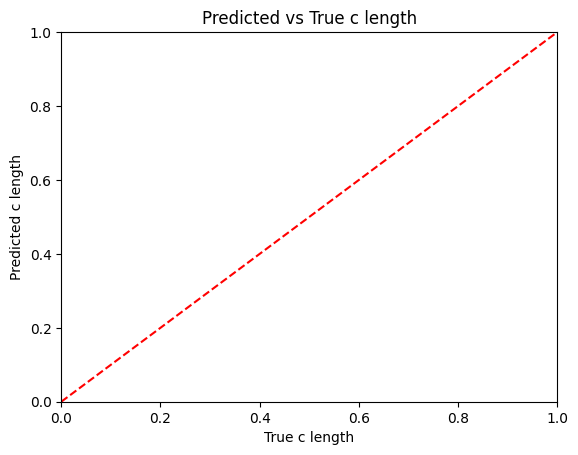

In [9]:
## Let's compare the predictions with the true values
import matplotlib.pyplot as plt
plt.scatter(y_true, predictions, alpha=0.1)
plt.xlabel("True c length")
plt.ylabel("Predicted c length")
plt.title("Predicted vs True c length")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [10]:
import joblib
import os

def save_model(model, path="../models/linear_model.joblib"):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    joblib.dump(model, path)

def load_model(path="../models/linear_model.joblib"):
    return joblib.load(path)

In [11]:
cv_scores = cross_validate_model(df)
print(f"CV R^2 scores: {cv_scores}")


CV R^2 scores: [0.95208597 0.95275645 0.95191645 0.95304768 0.95223454]


/home/karamel/projects/HypotAI/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


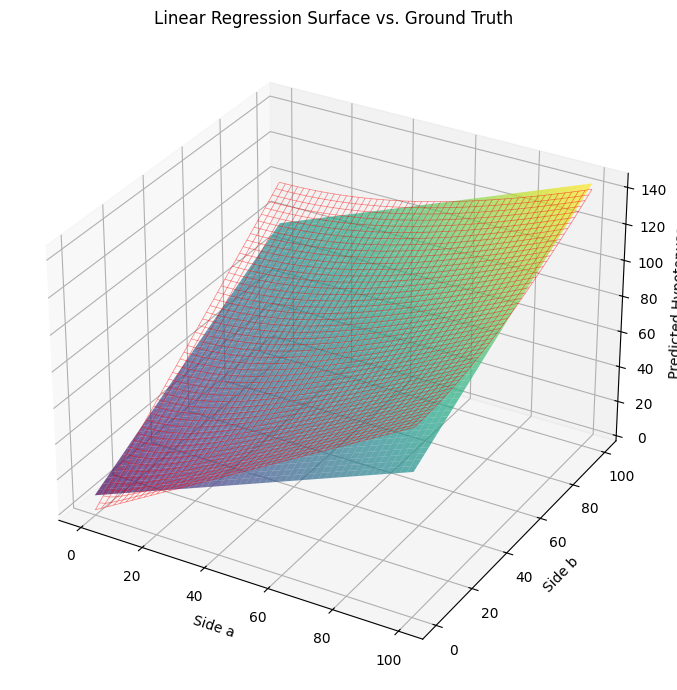

In [13]:
plot_regression_surface(modelLR,)